Тут находится краткое описание (в разработке)

In [1]:
#Импортируем все библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import Pool, CatBoostRegressor
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Загрузим файлы
main = pd.read_csv('C:/HW_train_main_data.csv')
add = pd.read_csv('C:/HW_train_additional_data.csv')

In [3]:
# Напишем функцию для прочтений информации в датасетах
def inform(data):
    return display(data.head()), data.info()

In [4]:
# Датасет основной
inform(main)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29000 non-null  int64  
 1   timestamp            29000 non-null  object 
 2   full_sq              29000 non-null  int64  
 3   life_sq              22935 non-null  float64
 4   floor                28843 non-null  float64
 5   max_floor            19887 non-null  float64
 6   material             19887 non-null  float64
 7   build_year           16059 non-null  float64
 8   num_room             19887 non-null  float64
 9   kitch_sq             19887 non-null  float64
 10  apartment condition  16088 non-null  float64
 11  sub_area             29000 non-null  int64  
 12  price                29000 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 2.9+ MB


(None, None)

In [5]:
# Датасет основной
inform(add)

,id,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,30392,155572,0.000070,5,5,240.0,1,0,7,3,0,16,1,2.86,0.00,0,0,0,0
1,36540,111874,0.089040,5,5,NaN,0,0,10,3,0,11,5,9.26,2.71,1,0,0,0
2,94669,129207,0.007720,6,6,NaN,0,0,4,2,0,4,2,13.80,0.00,4,0,0,0
3,17531,125354,0.265089,4,5,1937.0,3,0,6,4,0,2,0,7.46,0.00,1,0,0,0
4,32159,111023,0.025609,7,7,240.0,3,0,6,4,0,1,0,0.00,0.00,3,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               29000 non-null  int64  
 1   population                       29000 non-null  int64  
 2   indust_part                      29000 non-null  float64
 3   preschool_facilities             29000 non-null  int64  
 4   school_facilities                29000 non-null  int64  
 5   hospital_beds_raion              15253 non-null  float64
 6   healthcare_facilities            29000 non-null  int64  
 7   university_num                   29000 non-null  int64  
 8   sport_objects_facilities         29000 non-null  int64  
 9   additional_education_facilities  29000 non-null  int64  
 10  culture_objects_facilities       29000 non-null  int64  
 11  shopping_centers_facilities      29000 non-null  int64  
 12  office_num        

(None, None)

- Успешно загрузили, прочитали и вывели информацию по квартирам

- Имеем пропуски

- Необходимо скорректировать некоторые типы данных 

In [6]:
# Прежде чем приступить к обработке датасета, предлагаю объединить два датасета в один
full = main.merge(add, on='id', how='left')
display(full.head())
full.info()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,...,3,0,16,1,2.86,0.00,0,0,0,0
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,...,3,0,11,5,9.26,2.71,1,0,0,0
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,...,2,0,4,2,13.80,0.00,4,0,0,0
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,...,4,0,2,0,7.46,0.00,1,0,0,0
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,...,4,0,1,0,0.00,0.00,3,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29000 entries, 0 to 28999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               29000 non-null  int64  
 1   timestamp                        29000 non-null  object 
 2   full_sq                          29000 non-null  int64  
 3   life_sq                          22935 non-null  float64
 4   floor                            28843 non-null  float64
 5   max_floor                        19887 non-null  float64
 6   material                         19887 non-null  float64
 7   build_year                       16059 non-null  float64
 8   num_room                         19887 non-null  float64
 9   kitch_sq                         19887 non-null  float64
 10  apartment condition              16088 non-null  float64
 11  sub_area                         29000 non-null  int64  
 12  price             

Посмотрим распределение на всех числовых данных нашей таблицы

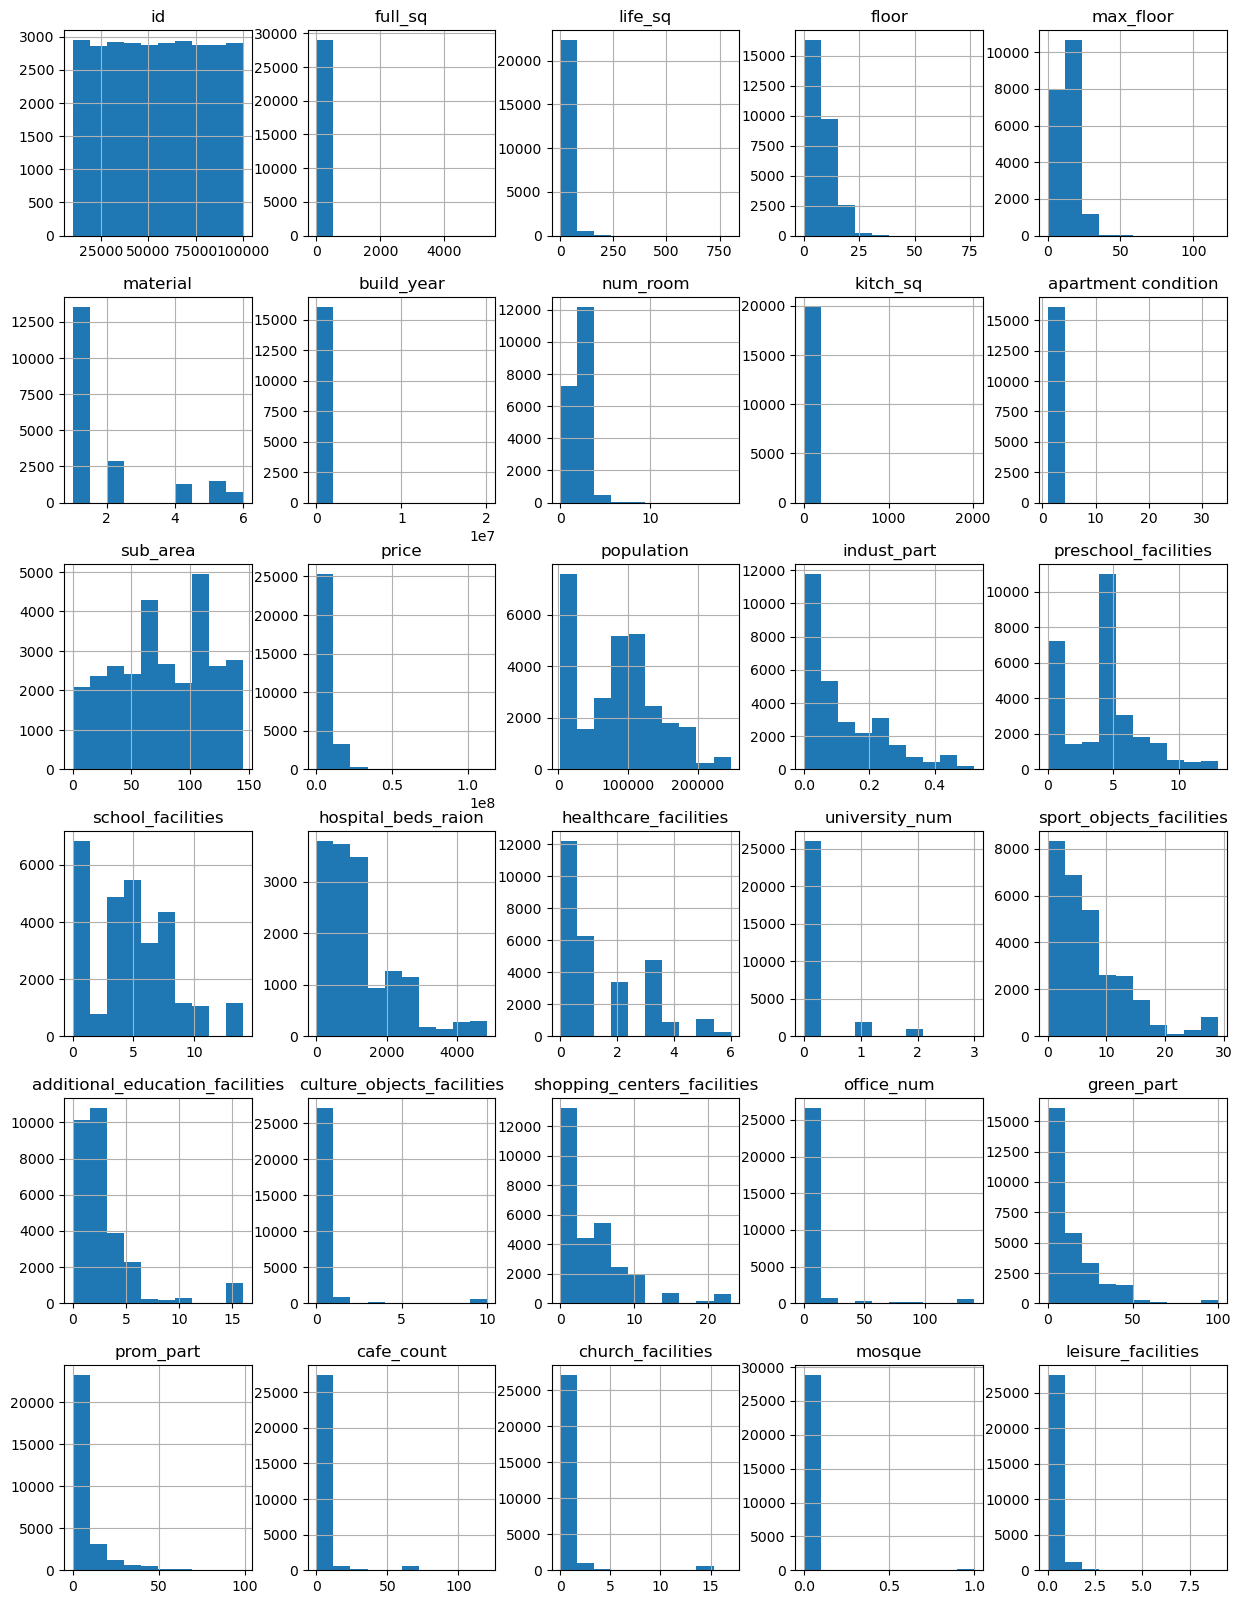

In [7]:
full.hist(figsize=(15, 20));

## Предобработка данных

In [8]:
# Посмотрим на количество пропусков
full.isna().sum()

id                                     0
timestamp                              0
full_sq                                0
life_sq                             6065
floor                                157
max_floor                           9113
material                            9113
build_year                         12941
num_room                            9113
kitch_sq                            9113
apartment condition                12912
sub_area                               0
price                                  0
population                             0
indust_part                            0
preschool_facilities                   0
school_facilities                      0
hospital_beds_raion                13747
healthcare_facilities                  0
university_num                         0
sport_objects_facilities               0
additional_education_facilities        0
culture_objects_facilities             0
shopping_centers_facilities            0
office_num      

In [9]:
a = full.query('full_sq > 0')['full_sq'].count()
a

28998

In [10]:
a/full.shape[0]

0.9999310344827587

In [11]:
full = full.query('full_sq > 0')
full = full.query('life_sq < full_sq')

Постараемся заполнить пропуски, там где это возможно. 

count    21844.000000
mean         0.602497
std          0.165660
min          0.000000
25%          0.517857
50%          0.581395
75%          0.644444
max          0.996933
dtype: float64

<AxesSubplot:>

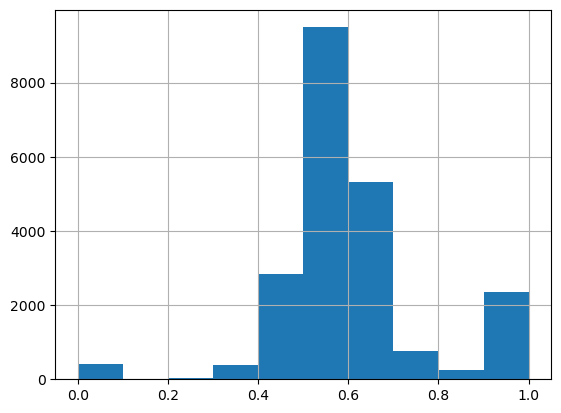

In [12]:
display((full['life_sq']/full['full_sq']).describe())
(full['life_sq']/full['full_sq']).hist(bins=10, range=(0,1))

In [13]:
(full.query('life_sq >= full_sq').shape[0])/full.shape[0]*100

0.0

In [14]:
mean_full_sq = (full['life_sq']/full['full_sq']).mean()
mean_full_sq

0.6024973217573364

### Начнем со столбца life_sq

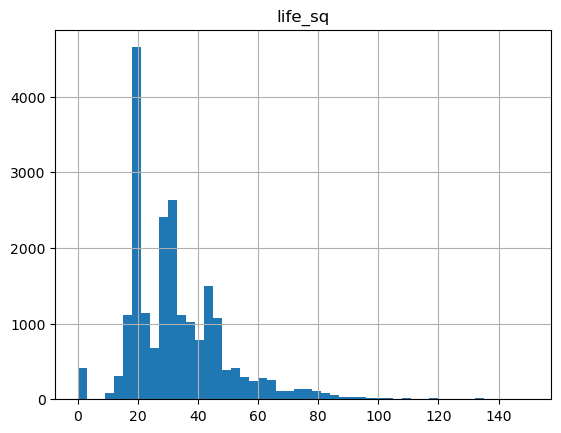

In [15]:
full.hist(column = 'life_sq', bins=50, range=(0,150));

In [16]:
# ЗАменим пропуска на медианное значение, оно более устойчиво к выбросам
full['life_sq'] = full['life_sq'].fillna(full['full_sq']*mean_full_sq)
# Проверка
full['life_sq'].isna().sum()

0

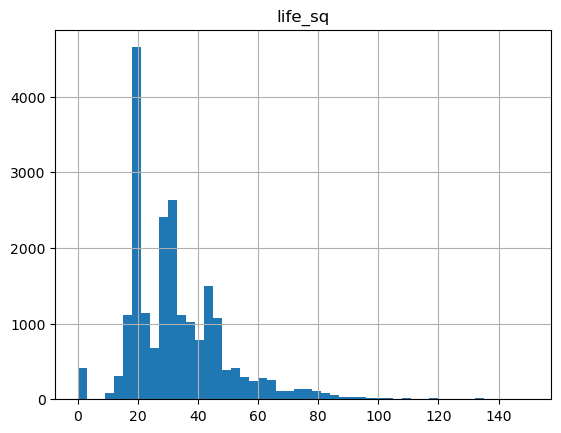

In [17]:
full.hist(column = 'life_sq', bins=50, range=(0,150));

Квартиры с околонулевой живой площадью скорее всего аномалии, поэтому также заменим их на медианное значение

In [18]:
full.loc[(full['life_sq'] < 5), 'life_sq'] = full.loc[(full['life_sq'] < 5), 'full_sq'] * mean_full_sq

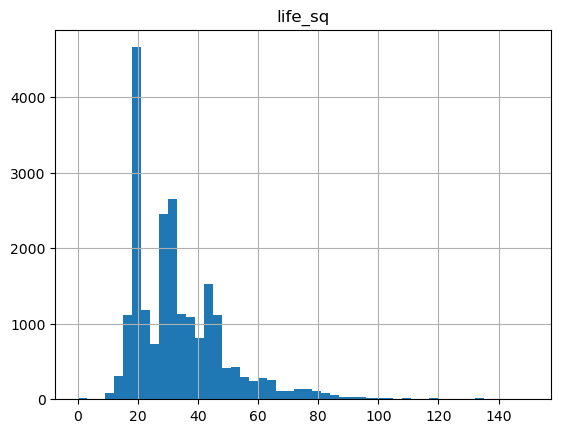

In [19]:
full.hist(column = 'life_sq', bins=50, range=(0,150));

### Столбец floor

In [20]:
# Процент пропуска от общего числа
full['floor'].isna().sum() / full.shape[0] * 100

0.5356161875114448

In [21]:
# Процент пропусков мал, поэтому удалим его
full = full.dropna(subset=['floor'])
# Проверим
full['floor'].isna().sum()

0

In [22]:
# Посчитаем количество аномалий
(full.query('floor>max_floor').shape[0])/(full.shape[0])*100

1.9514889308233994

In [23]:
# Делаем срез, перезаписываем данные
full = full.query('floor<=max_floor')

### Столбец max_floor

In [24]:
# ЗАменим пропуска на медианное значение, оно более устойчиво к выбросам
#full['max_floor'] = round(full['max_floor'].fillna(full['max_floor'].median()))
# Проверка
#full['max_floor'].isna().sum()

In [25]:
full['max_floor'].isna().sum()

0

### Столбец material

Оствим как есть, так как похоже на категориальные данные 

### Столбец build_year

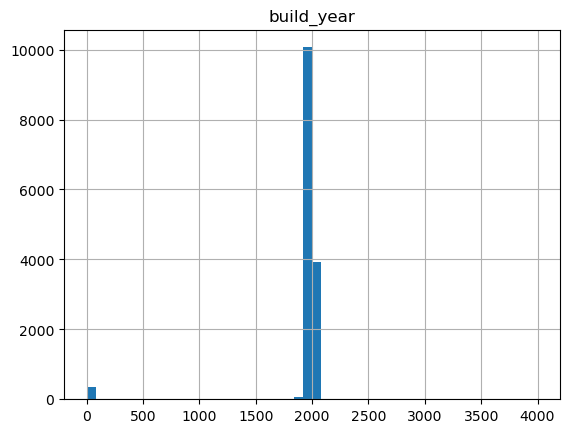

In [26]:
full.hist(column = 'build_year', bins=50, range=(0,4000));

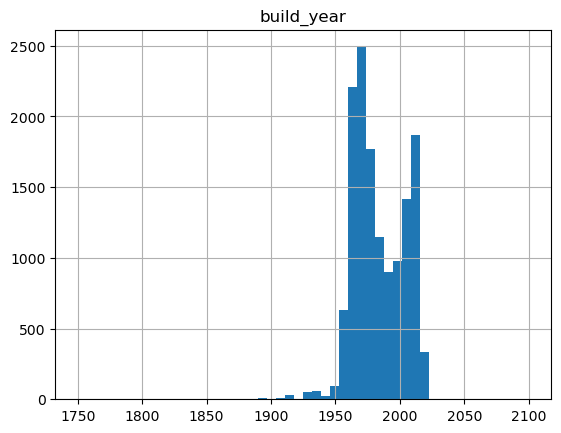

In [27]:
full.hist(column = 'build_year', bins=50, range=(1750,2100));

In [28]:
# Пояснение
full.query('build_year < 1850').shape[0]/full.shape[0]*100

2.3000134898151896

In [29]:
#Удаляем аномалии по годам
full = full.query('1850 <=build_year <= 2016')

In [30]:
# ПРоверка
full.query('build_year > 2016').shape[0]

0

In [31]:
# В прервом приближении меняем на медиану
full['build_year'] = full['build_year'].fillna(full['build_year'].median())
# Проверка
full['build_year'].isna().sum()

0

Квартиры с околонулевым годом постройки скорее всего аномалии, поэтому также заменим их на медианное значение.ж Доработать вывод

### Столбец num_room

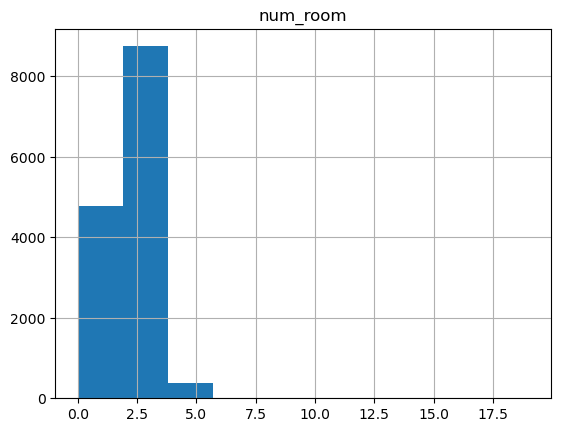

In [32]:
full.hist(column = 'num_room', bins=10);

In [33]:
# коммент
full.query('num_room > 6').shape[0]/full.shape[0]*100

0.06465981751562612

In [34]:
full = full.query('num_room <= 6')

In [35]:
# ЗАменим пропуска на медианное значение, можно и на среднее, значения плотно сконцентрированы, выбросов нет, первое приближение
full['num_room'] = round(full['num_room'].fillna(full['num_room'].median()))
# Проверка
full['num_room'].isna().sum()

0

### Столбец kitch_sq

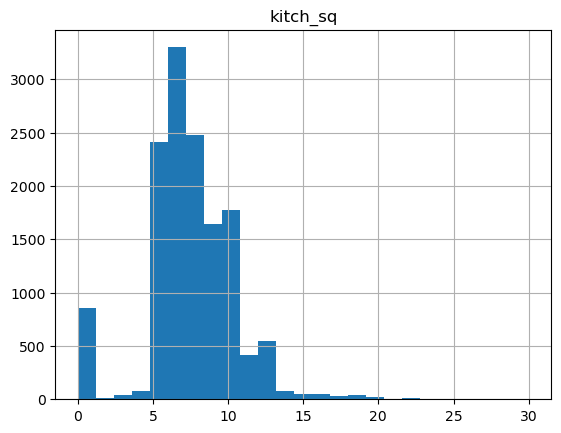

In [36]:
full.hist(column = 'kitch_sq', bins=25, range=(0,30));

In [37]:
# коммент
full.query('kitch_sq < 5').shape[0]/full.shape[0]*100

7.131560028756291

In [38]:
full = full.query('5 <= kitch_sq <= 25')

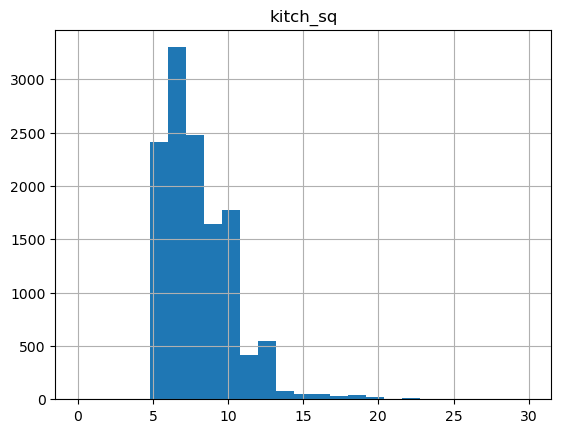

In [39]:
full.hist(column = 'kitch_sq', bins=25, range=(0,30));

In [40]:
# ЗАменим пропуска на медианное значение, оно более устойчиво к выбросам
full['kitch_sq'] = full['kitch_sq'].fillna(full['kitch_sq'].median())
# Проверка
full['kitch_sq'].isna().sum()

0

Кухни менее или равные 2 квадратам кажутся маловероятными, возможно, есть ошибка в данных, заменим их также на медианное значение

In [41]:
full.query('(life_sq + kitch_sq) > full_sq').shape[0]

423

In [42]:
full.query('(life_sq + kitch_sq) > full_sq').shape[0]/full.shape[0]*100

3.290292470441817

In [43]:
full = full.query('(life_sq + kitch_sq) <= full_sq')

### Столбец apartment condition

In [44]:
# Переименуем столбец
full = full.rename(columns={'apartment condition': 'apartment_condition'})

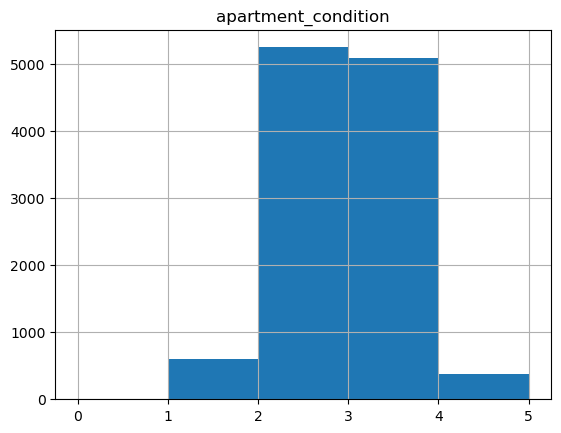

In [45]:
full.hist(column = 'apartment_condition', bins=5, range=(0,5));

In [46]:
full = full.query('apartment_condition <= 5')

In [47]:
# ЗАменим пропуска на медианное значение, можно и на среднее, значения плотно сконцентрированы, выбросов нет. 
full['apartment_condition'] = round(full['apartment_condition'].fillna(full['apartment_condition'].median()))
# Проверка
full['apartment_condition'].isna().sum()

0

### Столбец hospital_beds_raion

In [48]:
# ЗАменим пропуска на медианное значение, можно и на среднее, значения плотно сконцентрированы, выбросов нет. 
full['hospital_beds_raion'] = round(full['hospital_beds_raion'].fillna(full['hospital_beds_raion'].median()))
# Проверка
full['hospital_beds_raion'].isna().sum()

0

In [49]:
# ПРоверим
inform(full)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,...,3,0,16,1,2.86,0.0,0,0,0,0
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,...,4,0,2,0,7.46,0.0,1,0,0,0
10,51925,2015-04-30,61,39.0,8.0,9.0,1.0,1970.0,3.0,7.0,...,3,0,6,2,3.54,0.0,4,0,0,0
13,54890,2014-11-02,54,30.0,9.0,17.0,1.0,1997.0,2.0,8.0,...,6,0,11,4,7.91,0.0,3,0,0,0
15,97210,2014-12-25,75,46.0,3.0,17.0,1.0,1971.0,3.0,10.0,...,1,0,8,0,20.97,0.0,3,1,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11317 entries, 0 to 28999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               11317 non-null  int64  
 1   timestamp                        11317 non-null  object 
 2   full_sq                          11317 non-null  int64  
 3   life_sq                          11317 non-null  float64
 4   floor                            11317 non-null  float64
 5   max_floor                        11317 non-null  float64
 6   material                         11317 non-null  float64
 7   build_year                       11317 non-null  float64
 8   num_room                         11317 non-null  float64
 9   kitch_sq                         11317 non-null  float64
 10  apartment_condition              11317 non-null  float64
 11  sub_area                         11317 non-null  int64  
 12  price             

(None, None)

Привдем столбцы в нужные форматы

In [50]:
full['timestamp'] = pd.to_datetime(full['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [51]:
full['full_sq'] = full['full_sq'].astype(float)

full['floor'] = full['floor'].astype(int)

full['max_floor'] = full['max_floor'].astype(int)

full['material'] = full['material'].astype(int)

full['build_year'] = full['build_year'].astype(int)

full['num_room'] = full['num_room'].astype(int)

full['apartment_condition'] = full['apartment_condition'].astype(int)

full['sub_area'] = full['sub_area'].astype(float)

In [52]:
# Проверим на дубликаты
full.duplicated().sum()

0

Будем считать, что обработка данных завершена, приступим к анализу данных. 

## Исследовательский анализ

In [53]:
# Добавим еще несколько признаков: цена за метр квадратный, год, месяц, день недели

full['meter_price'] = full['price']/full['full_sq']

full['year'] = pd.DatetimeIndex(full['timestamp']).year 

full['month'] = pd.DatetimeIndex(full['timestamp']).month 

full['day'] = full['timestamp'].dt.weekday

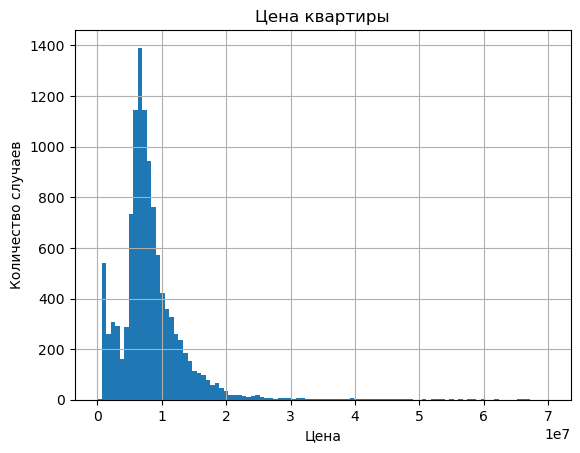

In [54]:
# определим гистограмму для цены квартиры
full.hist(column='price', grid=True, bins=100, range=(0,70000000));
plt.title('Цена квартиры')
plt.xlabel("Цена")
plt.ylabel("Количество случаев");

Наблюдаем два пика: 1) Первый указывает на спрос на бюджетное жилье 2) В основном квартиры 6-7 миллиона условных единиц (т.к. не знаю истиной валюты)

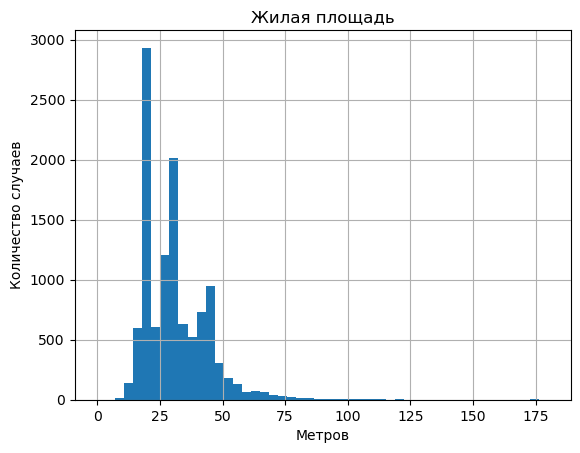

In [55]:
# Гостограмма по жилой площади
full.hist(column='life_sq', grid=True, bins=50, range=(0,180));
plt.title('Жилая площадь')
plt.xlabel("Метров")
plt.ylabel("Количество случаев");

График показывает, что люди также предпочитают более бюджетное жилье (примерно 20 метров жилой площади) и чуть больше 30 метров (средний класс внес свою лепту и замена пропусков)

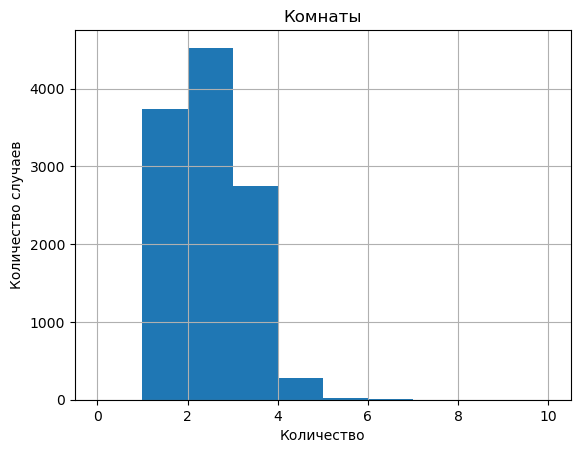

In [56]:
# Количество комнат
full.hist(column='num_room', grid=True, bins=10, range=(0,10));
plt.title('Комнаты')
plt.xlabel("Количество")
plt.ylabel("Количество случаев");

В основном преобладают 2х комнатные квартиры

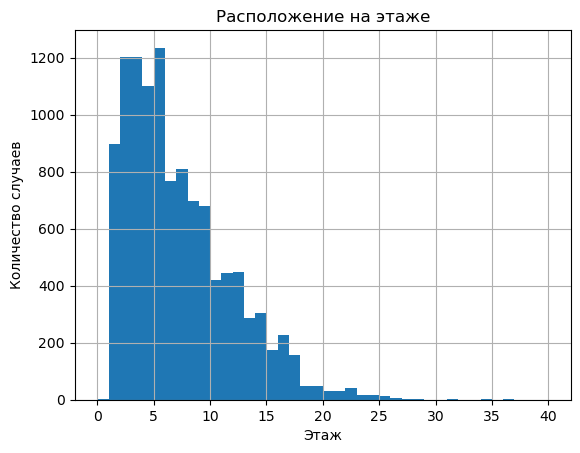

In [57]:
# По этажу
full.hist(column='floor', grid=True, bins=40, range=(0,40));
plt.title('Расположение на этаже')
plt.xlabel("Этаж")
plt.ylabel("Количество случаев");

Жители предпочитают низкие этажи, чем верхние. Связано может быть с низкой застройкой, так и с меньшей ценой в зависимости от этажа. Попробуем это подтвердить при следующем анализе. 

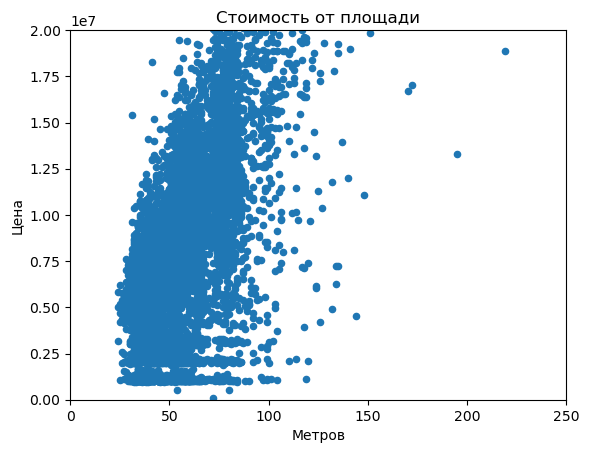

In [58]:
# Посмотрим как меняется цена квартиры от количества метров
full.plot(x='full_sq', y='price', kind='scatter', xlim=(0, 250), ylim=(0, 20000000));
plt.title('Стоимость от площади')
plt.xlabel("Метров")
plt.ylabel("Цена");

НА графике замечена линейная зависимость - чем больше метров, тем больше цена квартиры

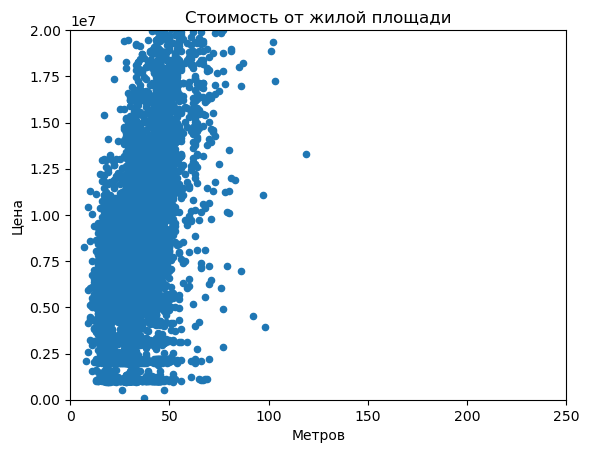

In [59]:
# Посмотрим как меняется цена квартиры от количества метров жилой площади
full.plot(x='life_sq', y='price', kind='scatter', xlim=(0, 250), ylim=(0, 20000000));
plt.title('Стоимость от жилой площади')
plt.xlabel("Метров")
plt.ylabel("Цена");

На грфике видно, что чем больше цена, тем больше количество жилой площади, цена разнится очень сильно, хотя метраж изменяется медленнее

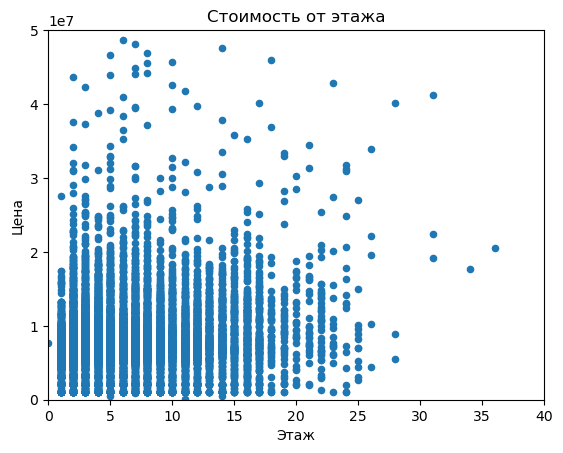

In [60]:
# Посмотрим как меняется цена квартиры от количества метров жилой площади
full.plot(x='floor', y='price', kind='scatter', xlim=(0, 40), ylim=(0, 50000000));
plt.title('Стоимость от этажа')
plt.xlabel("Этаж")
plt.ylabel("Цена");

Наша теория предыдущая не подтвердилась, в основном дорогие варианты расположены на низких этажах

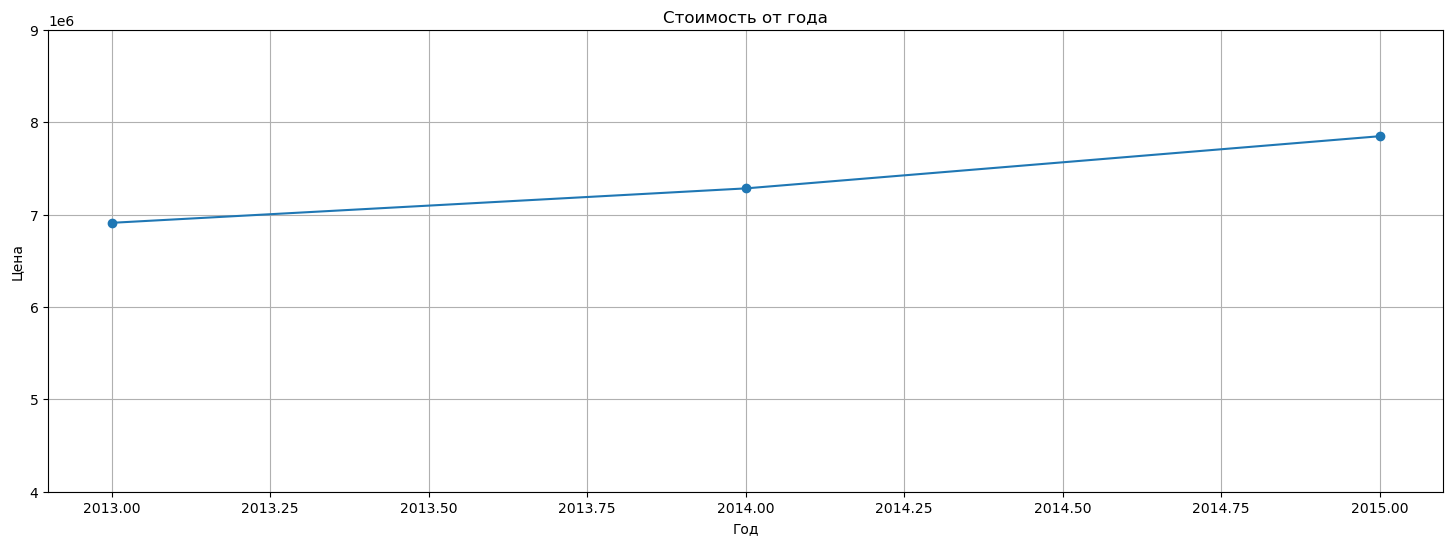

In [61]:
# Посмотрим, как менялась цена из года в год
plot_year = full.pivot_table(index='year', values = 'price', aggfunc = 'median')
# Поскольку мы не знаем, что за даты указаны в данных, будем считать, что это даты объявления
plot_year.plot(style ='o-', ylim=(4000000, 9000000), grid = True, figsize = (18,6), legend=False);
plt.title('Стоимость от года')
plt.xlabel("Год")
plt.ylabel("Цена");

Видим, что из года в год цена квартир увеличивается

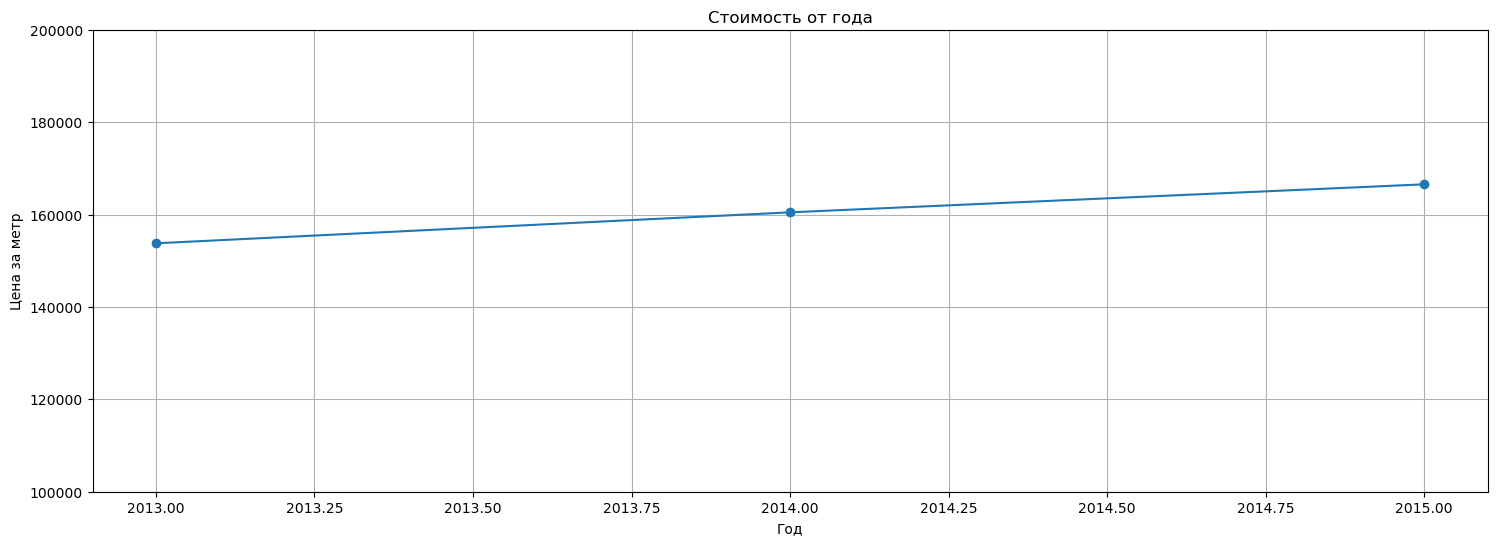

In [62]:
# Посмотрим, как менялась цена за метр из года в год
plot_year_price = full.pivot_table(index='year', values = 'meter_price', aggfunc = 'median')
# Поскольку мы не знаем, что за даты указаны в данных, будем считать, что это даты объявления
plot_year_price.plot(style ='o-', ylim=(100000, 200000), grid = True, figsize = (18,6), legend=False);
plt.title('Стоимость от года')
plt.xlabel("Год")
plt.ylabel("Цена за метр");

По сравнению с 2011 годом видим, что цена за метр в 2013 году упала, но к 2015 году даже возросла. Возможзно обусловлено кризисом и низкой покупательской способностью. 

 - Исследовательский анализ завершен

In [63]:
# Отбросим все ненужные нам столбцы
full = full.drop(['id', 'timestamp', 'year', 'month', 'day'], axis=1)
# Проверим
inform(full)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area,...,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities,meter_price
0,60.0,36.0,6,9,1,1974,3,5.0,3,9.0,...,0,16,1,2.86,0.0,0,0,0,0,161863.333333
3,33.0,18.0,4,9,1,1970,1,6.0,2,15.0,...,0,2,0,7.46,0.0,1,0,0,0,153181.818182
10,61.0,39.0,8,9,1,1970,3,7.0,3,17.0,...,0,6,2,3.54,0.0,4,0,0,0,155514.754098
13,54.0,30.0,9,17,1,1997,2,8.0,3,65.0,...,0,11,4,7.91,0.0,3,0,0,0,162925.925926
15,75.0,46.0,3,17,1,1971,3,10.0,3,115.0,...,0,8,0,20.97,0.0,3,1,0,0,161760.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11317 entries, 0 to 28999
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   full_sq                          11317 non-null  float64
 1   life_sq                          11317 non-null  float64
 2   floor                            11317 non-null  int32  
 3   max_floor                        11317 non-null  int32  
 4   material                         11317 non-null  int32  
 5   build_year                       11317 non-null  int32  
 6   num_room                         11317 non-null  int32  
 7   kitch_sq                         11317 non-null  float64
 8   apartment_condition              11317 non-null  int32  
 9   sub_area                         11317 non-null  float64
 10  price                            11317 non-null  float64
 11  population                       11317 non-null  int64  
 12  indust_part       

(None, None)

In [64]:
columns = full.columns

In [65]:
import phik
# Посмотрим матрицу корреляции признаков
full.phik_matrix(interval_cols=columns)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area,...,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities,meter_price
full_sq,1.000000,0.938160,0.295558,0.415530,0.440563,0.316624,0.747240,0.662444,0.292430,0.096028,...,0.115402,0.081483,0.130134,0.017214,0.000000,0.282301,0.119269,0.000000,0.135814,0.396711
life_sq,0.938160,1.000000,0.270066,0.379265,0.365500,0.234576,0.798865,0.538848,0.223961,0.083561,...,0.128126,0.103382,0.139674,0.081693,0.000000,0.277721,0.132174,0.000000,0.121734,0.356145
floor,0.295558,0.270066,1.000000,0.805875,0.399302,0.332751,0.059627,0.435590,0.192802,0.098816,...,0.029122,0.054642,0.211588,0.085015,0.000000,0.249614,0.115569,0.000000,0.010838,0.169072
max_floor,0.415530,0.379265,0.805875,1.000000,0.689519,0.594438,0.135223,0.680101,0.358518,0.221161,...,0.142376,0.176482,0.200978,0.172588,0.048430,0.254262,0.185932,0.006601,0.060983,0.345181
material,0.440563,0.365500,0.399302,0.689519,1.000000,0.573246,0.121772,0.549303,0.309157,0.236126,...,0.118204,0.160913,0.202325,0.137402,0.135094,0.228040,0.111723,0.009757,0.131699,0.337955
build_year,0.316624,0.234576,0.332751,0.594438,0.573246,1.000000,0.224842,0.516687,0.380456,0.260673,...,0.227592,0.268675,0.278082,0.131622,0.053717,0.417386,0.339938,0.048657,0.462759,0.258190
num_room,0.747240,0.798865,0.059627,0.135223,0.121772,0.224842,1.000000,0.238159,0.076711,0.048807,...,0.105695,0.069710,0.105761,0.006423,0.000000,0.150225,0.097942,0.000000,0.115275,0.158632
kitch_sq,0.662444,0.538848,0.435590,0.680101,0.549303,0.516687,0.238159,1.000000,0.399838,0.252582,...,0.094466,0.138160,0.076911,0.114674,0.099101,0.165933,0.050667,0.023256,0.020682,0.344768
apartment_condition,0.292430,0.223961,0.192802,0.358518,0.309157,0.380456,0.076711,0.399838,1.000000,0.233420,...,0.025101,0.165955,0.064244,0.119621,0.025045,0.057084,0.033120,0.013650,0.036911,0.288501
sub_area,0.096028,0.083561,0.098816,0.221161,0.236126,0.260673,0.048807,0.252582,0.233420,1.000000,...,0.395112,0.557139,0.393512,0.234859,0.183390,0.214736,0.140334,0.140354,0.110334,0.305223


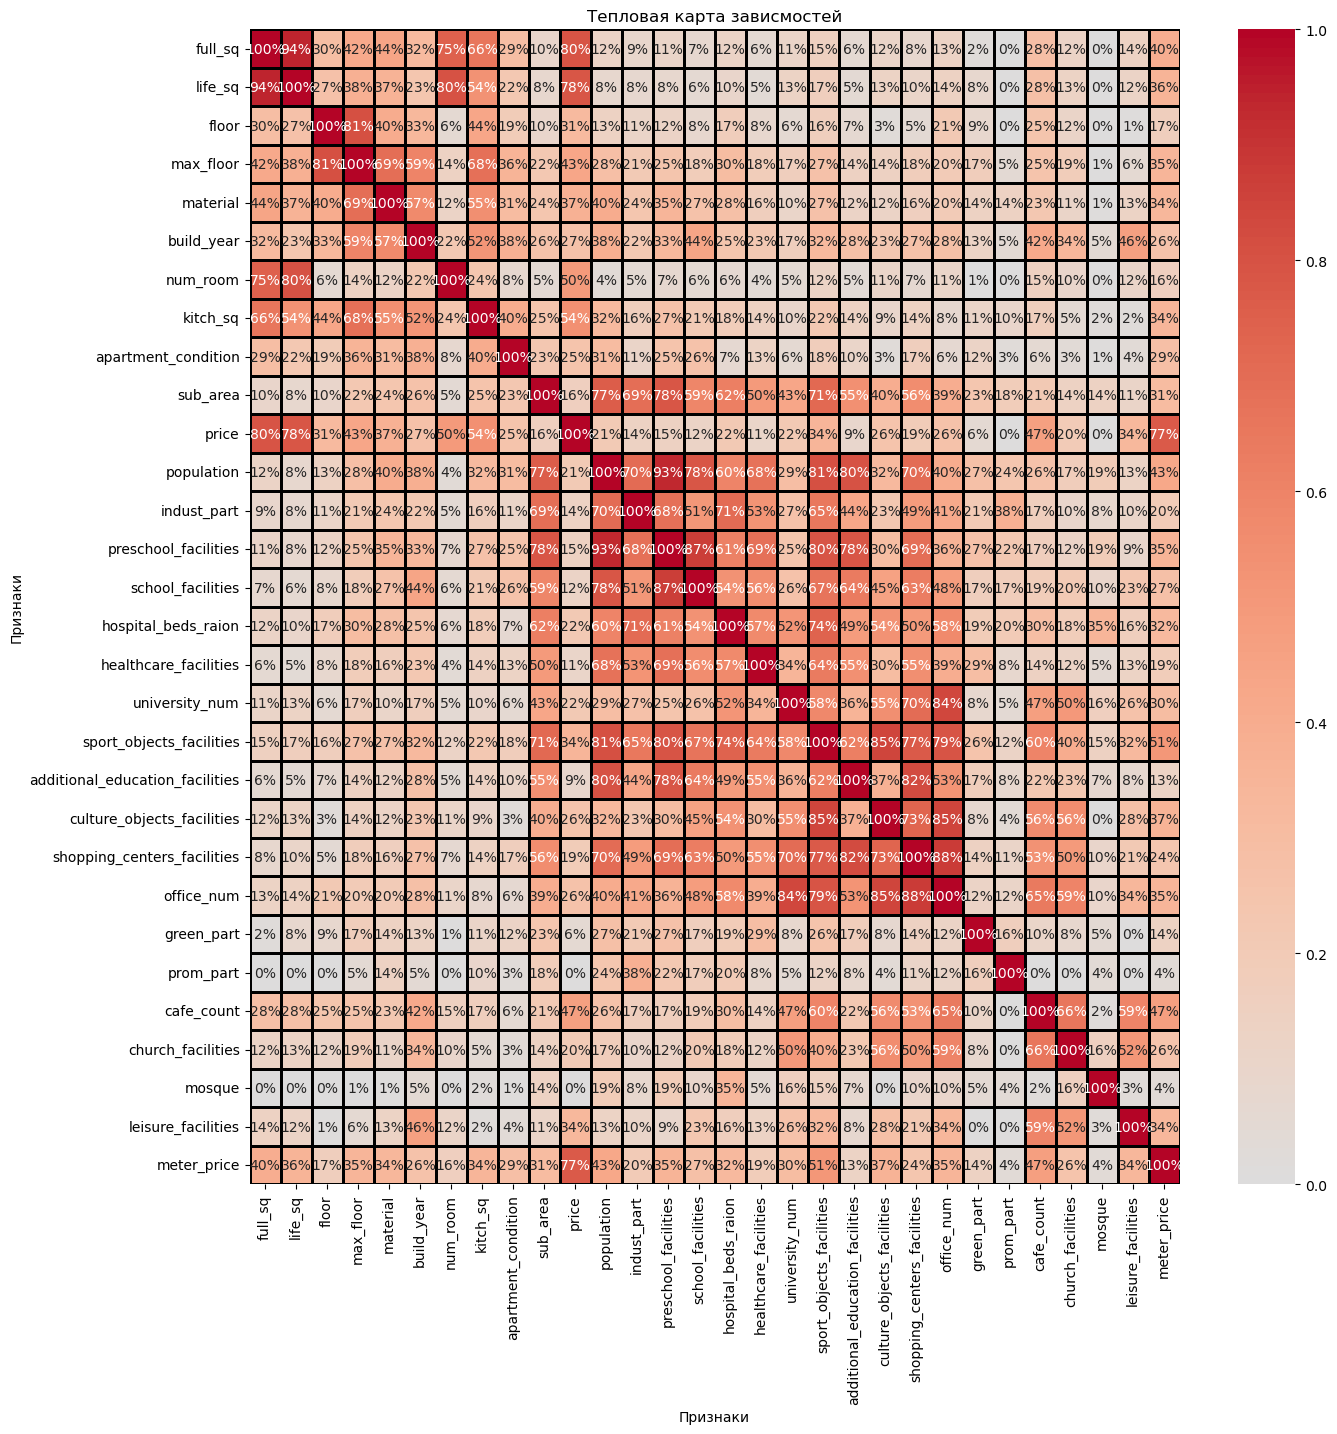

In [66]:
plt.figure(figsize=(15, 15))
sns.heatmap(full.phik_matrix(interval_cols=columns), 
            annot = True, fmt='.0%', vmin=0, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
plt.title('Тепловая карта зависмостей')
plt.ylabel('Признаки')
plt.xlabel('Признаки');

Присутствуют признаки, создающие мультиколлинеарность. Но пока оставим все на своих местах.

Будем считать, что предобработка данных выполнена, и исследовательский анализ. Перейдем к обучению моделей. 

### Обучение моделей

In [67]:
RANDOM_STATE = 69

Разделим датасет на тренировочную, валидационную и тестовые выборки в отношении 3:1:1 соответсвенно.

In [68]:
full_train, full_valid_test = train_test_split(full, test_size=0.4, random_state=RANDOM_STATE)
#Проверяем
print(full_train.shape)
print(full_valid_test.shape)

(6790, 30)
(4527, 30)


In [69]:
full_valid, full_test = train_test_split(full_valid_test, test_size=0.5, random_state=RANDOM_STATE)
#Проверяем
print(full_valid.shape)
print(full_test.shape)

(2263, 30)
(2264, 30)


Все сошлось, теперь выделим по каждой выборке целевые(target) и нецелевые признаки(features):

In [70]:
#Тренировочные
features_train = full_train.drop(['price'], axis=1)
target_train = full_train['price']
columns_features_train = features_train.columns

In [71]:
#Валидационные
features_valid = full_valid.drop(['price'], axis=1)
target_valid = full_valid['price']

In [72]:
#Тестовые
features_test = full_test.drop(['price'], axis=1)
target_test = full_test['price']

Во всем датасете нет категориальных данных, а толбко количественные, поэтому помощью различных Энкодеров пренебрегаем. 
Но сделаем масштабирование данных, так как разброс очень велик. 

In [73]:
# создаём скелер
scaler = StandardScaler()
# обучаем его на признаках тренировочной выборки
scaler.fit(features_train)
# трансформируем
features_train_scaled = scaler.transform(features_train)

In [74]:
# почему-то преобразовалось это в массив numpy, пришлось преобразовывать
features_train_scaled = pd.DataFrame(data=features_train_scaled, columns=columns_features_train)

In [75]:
# посмотрим на данные
features_train_scaled.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area,...,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities,meter_price
0,0.036742,0.171443,-1.006515,-0.770998,0.091184,-1.233878,0.030076,-0.341065,-0.716089,1.421694,...,1.109245,3.431407,2.995035,-0.448707,-0.287728,1.860208,0.669197,-0.080761,-0.198467,0.984791
1,-0.635709,-1.051825,-0.794344,0.311636,0.091184,-0.298879,-1.164186,0.069689,0.839829,-0.751883,...,-0.151303,-0.456865,-0.134446,-0.489327,-0.476410,0.101022,-0.337415,-0.080761,-0.198467,-0.077338
2,-0.428801,-0.057920,-0.582173,-0.590559,-0.595985,-0.463879,0.030076,-0.751818,-0.716089,-0.657379,...,-0.151303,-0.942899,-0.195808,-0.665347,-0.268860,0.394219,-0.337415,-0.080761,-0.198467,0.543554
3,0.605739,1.012439,0.054339,-0.049242,2.152693,-0.408879,1.224339,0.480443,-0.716089,1.303565,...,-0.151303,0.758220,0.540540,-0.600036,-0.476410,0.101022,-0.337415,-0.080761,-0.198467,0.283864
4,-0.221893,-0.134374,-0.157831,0.672514,1.465523,1.791118,0.030076,0.069689,0.839829,0.783797,...,-0.151303,-0.942899,-0.441258,-0.169944,-0.344333,-0.485374,-0.337415,-0.080761,-0.198467,-0.618494


In [76]:
# аналогичную процедуру проделываем на валидацинной и тестовой выборке, только обучать уже ничего не нужно, просто используем метод transform

features_valid_scaled = scaler.transform(features_valid)

features_test_scaled = scaler.transform(features_test)

In [77]:
# почему-то преобразовалось это в массив numpy, пришлось преобразовывать, нужна пояснительная бригада

features_train_scaled = pd.DataFrame(data=features_train_scaled, columns=columns_features_train)

features_train_scaled = pd.DataFrame(data=features_train_scaled, columns=columns_features_train)

In [78]:
# посмотрим на данные
display(features_train_scaled.head())
features_train_scaled.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area,...,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities,meter_price
0,0.036742,0.171443,-1.006515,-0.770998,0.091184,-1.233878,0.030076,-0.341065,-0.716089,1.421694,...,1.109245,3.431407,2.995035,-0.448707,-0.287728,1.860208,0.669197,-0.080761,-0.198467,0.984791
1,-0.635709,-1.051825,-0.794344,0.311636,0.091184,-0.298879,-1.164186,0.069689,0.839829,-0.751883,...,-0.151303,-0.456865,-0.134446,-0.489327,-0.476410,0.101022,-0.337415,-0.080761,-0.198467,-0.077338
2,-0.428801,-0.057920,-0.582173,-0.590559,-0.595985,-0.463879,0.030076,-0.751818,-0.716089,-0.657379,...,-0.151303,-0.942899,-0.195808,-0.665347,-0.268860,0.394219,-0.337415,-0.080761,-0.198467,0.543554
3,0.605739,1.012439,0.054339,-0.049242,2.152693,-0.408879,1.224339,0.480443,-0.716089,1.303565,...,-0.151303,0.758220,0.540540,-0.600036,-0.476410,0.101022,-0.337415,-0.080761,-0.198467,0.283864
4,-0.221893,-0.134374,-0.157831,0.672514,1.465523,1.791118,0.030076,0.069689,0.839829,0.783797,...,-0.151303,-0.942899,-0.441258,-0.169944,-0.344333,-0.485374,-0.337415,-0.080761,-0.198467,-0.618494


,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment_condition,sub_area,...,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities,meter_price
0,0.036742,0.171443,-1.006515,-0.770998,0.091184,-1.233878,0.030076,-0.341065,-0.716089,1.421694,...,1.109245,3.431407,2.995035,-0.448707,-0.287728,1.860208,0.669197,-0.080761,-0.198467,0.984791
1,-0.635709,-1.051825,-0.794344,0.311636,0.091184,-0.298879,-1.164186,0.069689,0.839829,-0.751883,...,-0.151303,-0.456865,-0.134446,-0.489327,-0.476410,0.101022,-0.337415,-0.080761,-0.198467,-0.077338
2,-0.428801,-0.057920,-0.582173,-0.590559,-0.595985,-0.463879,0.030076,-0.751818,-0.716089,-0.657379,...,-0.151303,-0.942899,-0.195808,-0.665347,-0.268860,0.394219,-0.337415,-0.080761,-0.198467,0.543554
3,0.605739,1.012439,0.054339,-0.049242,2.152693,-0.408879,1.224339,0.480443,-0.716089,1.303565,...,-0.151303,0.758220,0.540540,-0.600036,-0.476410,0.101022,-0.337415,-0.080761,-0.198467,0.283864
4,-0.221893,-0.134374,-0.157831,0.672514,1.465523,1.791118,0.030076,0.069689,0.839829,0.783797,...,-0.151303,-0.942899,-0.441258,-0.169944,-0.344333,-0.485374,-0.337415,-0.080761,-0.198467,-0.618494


Преобразования выполнили, перейдем к обучением моделей

### Модель DecisionTreeRegressor

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
%%time
model_dtr = DecisionTreeRegressor(random_state=RANDOM_STATE)
parameters_dtr = {'max_depth'  : [x for x in range(3,10)],
                  'min_samples_split'  : [x for x in range(10,50,5)]
                 }

grid_dtr = GridSearchCV(estimator=model_dtr, 
                      param_grid = parameters_dtr,  
                      scoring='neg_root_mean_squared_error', 
                      cv=3)

# обучим
grid_dtr.fit(features_train_scaled, target_train)

print(" Результаты DecisionTreeRegressor" )
print("\n Лучший RMSE DecisionTreeRegressor:\n",grid_dtr.best_score_*(-1))
print("\n Лучшие параметры DecisionTreeRegressor:\n",grid_dtr.best_params_)

 Результаты DecisionTreeRegressor

 Лучший RMSE DecisionTreeRegressor:
 875950.4164141649

 Лучшие параметры DecisionTreeRegressor:
 {'max_depth': 9, 'min_samples_split': 10}
Wall time: 4.33 s


In [81]:
# вычислим rmse для ваоидационных данных
grid_dtr.best_estimator_.fit(features_train_scaled, target_train)
# вычислим предсказания
predictions_valid_grid_dtr = grid_dtr.predict(features_valid_scaled)
print("RMSE на валидационной выборке: ", mean_squared_error(target_valid, predictions_valid_grid_dtr)**0.5)

RMSE на валидационной выборке:  870840.1450288559


### Модель RandomForestRegressor

In [82]:
%%time
model_rfr = RandomForestRegressor(random_state=RANDOM_STATE)
parameters_rfr = {'n_estimators'  : [x for x in range(20,200,20)],
                  'max_depth'  : [x for x in range(3,10)]
                 }

grid_rfr = GridSearchCV(estimator=model_rfr, 
                        param_grid = parameters_rfr,  
                        scoring='neg_root_mean_squared_error', 
                        cv=3)

# обучим
grid_rfr.fit(features_train_scaled, target_train)

print(" Результаты DecisionTreeRegressor" )
print("\n Лучший RMSE DecisionTreeRegressor:\n",grid_rfr.best_score_*(-1))
print("\n Лучшие параметры DecisionTreeRegressor:\n",grid_rfr.best_params_)

 Результаты DecisionTreeRegressor

 Лучший RMSE DecisionTreeRegressor:
 657914.2990958132

 Лучшие параметры DecisionTreeRegressor:
 {'max_depth': 9, 'n_estimators': 120}
Wall time: 8min 6s


In [83]:
# вычислим rmse для ваоидационных данных
grid_rfr.best_estimator_.fit(features_train_scaled, target_train)
# вычислим предсказания
predictions_valid_grid_rfr = grid_rfr.predict(features_valid_scaled)
print("RMSE на валидационной выборке: ", mean_squared_error(target_valid, predictions_valid_grid_rfr)**0.5)

RMSE на валидационной выборке:  588933.4827024544


### Модель CatBoostRegressor

In [84]:
%%time
model_cbr = CatBoostRegressor(verbose=False, random_state=RANDOM_STATE)


parameters_cbr = {'depth'         : [3, 5, 7, 9, 11],
                  'learning_rate' : [0.01, 0.05, 0.1, 0.3],
                  'iterations'    : [50, 100, 300, 500]
                 }

grid_cbr = GridSearchCV(estimator=model_cbr, 
                        param_grid = parameters_cbr,  
                        scoring='neg_root_mean_squared_error', 
                        cv=2,
                        verbose=False,
                        n_jobs=-1)

grid_cbr.fit(features_train, target_train)

print(" Результаты CatBoostRegression" )
print("\n best RMSE CatBoostRegression:\n",grid_cbr.best_score_*(-1))
print("\n best parameters CatBoostRegression:\n",grid_cbr.best_params_)

 Результаты CatBoostRegression

 best RMSE CatBoostRegression:
 482979.05272439215

 best parameters CatBoostRegression:
 {'depth': 3, 'iterations': 500, 'learning_rate': 0.3}
Wall time: 15min 2s


In [85]:
# вычислим rmse для ваоидационных данных
grid_cbr.best_estimator_.fit(features_train_scaled, target_train)
# вычислим предсказания
predictions_valid_grid_cbr = grid_cbr.predict(features_valid_scaled)
print("RMSE на валидационной выборке: ", mean_squared_error(target_valid, predictions_valid_grid_cbr)**0.5)

RMSE на валидационной выборке:  494351.37706758373


### Модель LGBMRegressor

In [86]:
%%time
model_lgbm = lgb.LGBMRegressor(objective="regression", 
                              metric='rmse', 
                              boosting_type='gbdt',
                              random_state=RANDOM_STATE)

parameters_lgbm = {
    'num_leaves': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 300, 500]
                  }

grid_lgbm = GridSearchCV(model_lgbm, parameters_lgbm, scoring='neg_root_mean_squared_error', cv=2)

grid_lgbm.fit(features_train, target_train)

print(" Результаты LGBMRegressor" )
print("\n best RMSE LGBMRegressor:\n",grid_lgbm.best_score_*(-1))
print("\n best parameters LGBMRegressor:\n",grid_lgbm.best_params_)

 Результаты LGBMRegressor

 best RMSE LGBMRegressor:
 720554.6896839284

 best parameters LGBMRegressor:
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'num_leaves': 7}
Wall time: 1min 44s


In [87]:
# вычислим rmse для ваоидационных данных
grid_lgbm.best_estimator_.fit(features_train_scaled, target_train)
# вычислим предсказания
predictions_valid_grid_lgbm = grid_lgbm.predict(features_valid_scaled)
print("RMSE на валидационной выборке: ", mean_squared_error(target_valid, predictions_valid_grid_lgbm)**0.5)

RMSE на валидационной выборке:  542216.1095952183


Наилучшей моделью оказалась CatBoostRegressor с показателем RMSE 482979.05, проверим модель на тестовых данных

In [88]:
# вычислим rmse для тестовых данных для лучшей модели CatBoostRegressor

best_grid_cbr = grid_cbr.best_estimator_.fit(features_train_scaled, target_train)
# вычислим предсказания
predictions_test_best_grid_cbr = best_grid_cbr.predict(features_test_scaled)
print("RMSE на валидационной выборке: ", mean_squared_error(target_test, predictions_test_best_grid_cbr)**0.5)

RMSE на валидационной выборке:  468555.73379740096


### Важность признаков

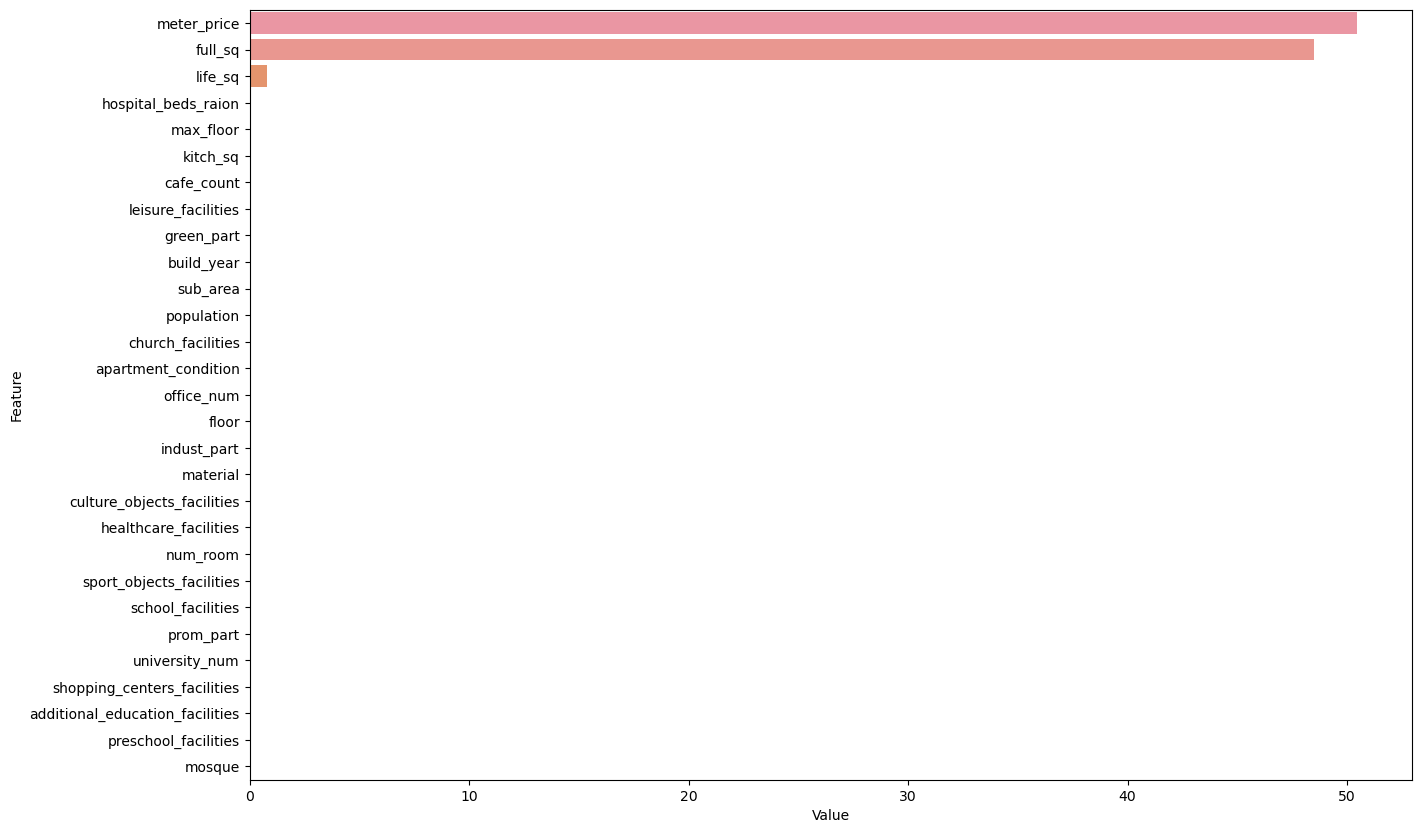

In [89]:
plt.figure(figsize=[15, 10])
feature_imp = pd.DataFrame({'Value':best_grid_cbr.feature_importances_,'Feature':features_train_scaled.columns})
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False))
plt.show();

Столбчатая диаграмма показывает, что самый важный признак это цена за метр квадратный, т.е. чем болшье цена за метр квадратный, тем вероятнее больше цена квартиры. Затем идет полная площадь, что логично, чем больше площадь, тем больше цена. 
Остальные же признаки почти не вностят вклад в окончательную стоимость. 